In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

import joblib


In [11]:
df = pd.read_csv('mobile_money_fraud.csv')

df.head()


,Transaction_Amount,Transaction_Time,Sender_Age,Receiver_New_Account,Location_Risk_Score,Device_Change,Transaction_Frequency,Fraud
0,2.741152e+07,14.0,53.0,0,1,1,14.0,0
1,1.820943e+07,11.0,56.0,0,1,1,18.0,1
2,3.419551e+07,13.0,47.0,1,1,0,10.0,0
3,2.992178e+07,14.0,34.0,1,1,0,15.0,0
4,2.991430e+07,9.0,65.0,0,0,0,17.0,1


In [12]:
# Check missing values
df.isnull().sum()

# Fill missing values
df.fillna(df.mean(), inplace=True)

# Separate features and target
X = df.drop('Fraud', axis=1)
y = df['Fraud']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

# Convert regression output to classification (threshold 0.5)
lr_pred_class = [1 if x > 0.5 else 0 for x in lr_pred]

lr_acc = accuracy_score(y_test, lr_pred_class)

print("Linear Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred_class))


Linear Regression Accuracy: 0.865
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1017
           1       0.67      0.22      0.34       183

    accuracy                           0.86      1200
   macro avg       0.77      0.60      0.63      1200
weighted avg       0.84      0.86      0.84      1200



In [14]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_acc)
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.9033333333333333
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1017
           1       0.69      0.67      0.68       183

    accuracy                           0.90      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.90      0.90      0.90      1200



In [15]:
if dt_acc > lr_acc:
    best_model = dt
    print("Best Model: Decision Tree")
else:
    best_model = lr
    print("Best Model: Linear Regression")


Best Model: Decision Tree


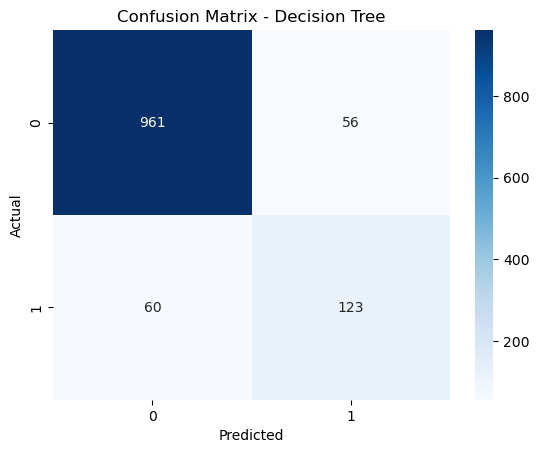

In [7]:
cm = confusion_matrix(y_test, dt_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


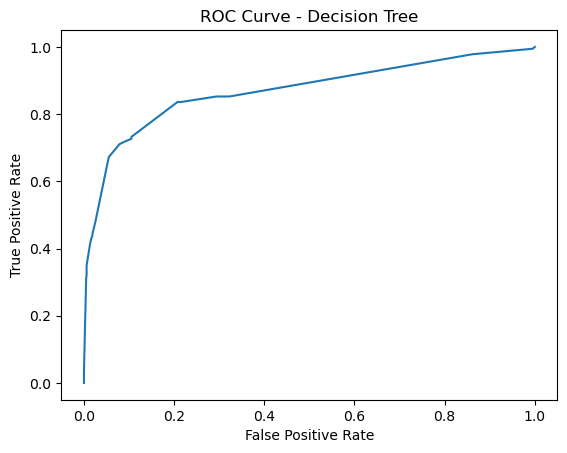

AUC Score: 0.8693414145321878


In [8]:
dt_probs = dt.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, dt_probs)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.show()

print("AUC Score:", roc_auc_score(y_test, dt_probs))


In [9]:
joblib.dump(best_model, 'model.pkl')


['model.pkl']